# 9/17 : Linear and Logistic Regression

Hi everyone! In this notebook, we'll be going over linear and logistic regression, two of the most fundamental algorithms for natural language processing

In this notebook, we have the following methods for you to fill out:
1. `lin_reg_cost()`
2. `lin_reg_derivative()`
3. `linear_grad_descent()`
4. whats up

We'll start by importing numpy, as well as matplotlib for graphing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Part 1: Calculating the cost for linear regression

Below, we have the function definition for `lin_reg_cost()`

Recall that the `cost` of our predicted values for linear regression can be calculated by the following formula:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{2m}\sum_{i&space;=&space;1}^{m}(predicted&space;-&space;actual)^2" title="\frac{1}{2m}\sum_{i = 1}^{m}(predicted - actual)^2" />

Calculate the `cost` according to that formula, and return the result

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Try to use numpy functions! You might find <code>np.sum()</code> and <code>np.square()</code> very useful</li>

</ul>
</p>

In [2]:
def lin_reg_cost(predicted, actual, m):
    cost = (1 / (2 * m)) * np.sum(np.square(predicted - actual))
    return cost

In [6]:
# run this cell to test your code
np.random.seed(0)
predicted_test = np.random.random((4, 1))
actual_test = np.random.random((4, 1))
m_test = 30

calc_linear_reg_cost = lin_reg_cost(predicted_test, actual_test, m_test)

print("Outputted cost: {0}".format(calc_linear_reg_cost))
print("Expected cost: 0.0028013707428165427")

if (calc_linear_reg_cost == 0.0028013707428165427):
      print("Nice one!")
else:
      print("Yikes")

Outputted cost: 0.0028013707428165427
Expected cost: 0.0028013707428165427
Nice one!


## Part 2: Calculating the cost derivative for linear regression

Now that we have the `cost`, we will evaluate `lin_reg_derivative` for each slope of `lin_reg_cost`

The derivative of our `cost` function is:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{m}\sum_{i&space;=&space;1}^{m}[x_i&space;*&space;(predicted&space;-&space;actual)]" title="\frac{1}{m}\sum_{i = 1}^{m}[x_i * (predicted - actual)]" />

<br></br>
To avoid looping through every value, we can simplify this using matrix functions to:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{m}&space;*&space;[X^T&space;\cdot&space;(predicted&space;-&space;actual)]" title="\frac{1}{m} * [X^T \cdot (predicted - actual)]" />

**Note: • represents the matirx dot product (matrix multiplication), and X = inputs**

Calculate the `derivative` and return its value

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Make sure you are transposing the matrix and taking the dot product (not just multiplying)</li>
</ul>
</p>

In [7]:
def lin_reg_derivative(predicted, actual, inputs, m):
    derivative = (1 / m) * (inputs.T @ (predicted - actual))
    return derivative

In [8]:
# run this cell to test your code
np.random.seed(0)
predicted_test = np.random.random((4, 1))
actual_test = np.random.random((4, 1))
m_test = 30
inputs_test = np.random.random((4, 2))

calc_lin_deriv = np.round(lin_reg_derivative(predicted_test, actual_test, inputs_test, m_test), 7)

print("Expected values: [0.0081553, 0.0069101]")
print("Actual values: [{0}, {1}]".format(calc_lin_deriv[0][0], calc_lin_deriv[1][0]))

if (calc_lin_deriv.shape != (2, 1)):
    print("Incorrect dimensions")
elif (calc_lin_deriv[0] != 0.0081553):
    print("Incorrect value at index 0")
elif (calc_lin_deriv[1] != 0.0069101):
    print("Incorrect value at index 1")
else:
    print("You're all good here homie!")

Expected values: [0.0081553, 0.0069101]
Actual values: [0.0081553, 0.0069101]
You're all good here homie!


## Part 3: Testing your linear regression algorithm

Now that we have our `cost` and `cost derivative` values calculated, we can test our algorithm!

We will start by creating and plotting our data set

Text(0, 0.5, 'y')

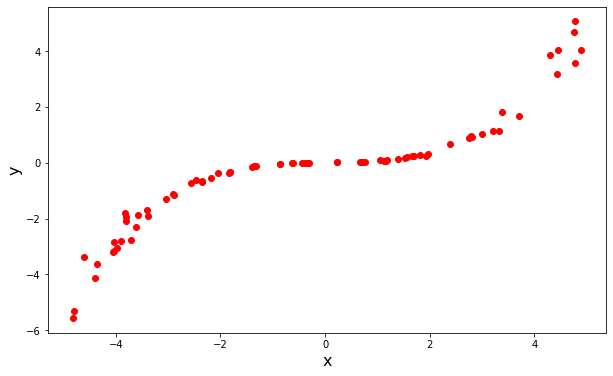

In [9]:
# initialize a random data set
random_x = np.random.random(75) * 10 - 5
random_y = 0.01 * (np.power(random_x, 3) * (np.random.random(75) * 2 + 3) + np.square(random_x) * (np.random.random(75) * 2 - 2) + random_x * (np.random.random(75) * 2 + 1) + np.random.random(75) * 2)

# graph this data
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(random_x, random_y, 'ro')
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)

A big part of modeling is deciding which function best fits our data

In this case, it's safe to assume that this function is:


<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;y&space;=&space;\Theta_0&space;&plus;&space;\Theta_1&space;x&space;&plus;&space;\Theta_2x^2&space;&plus;&space;\Theta_3x^3" title="y = \Theta_0 + \Theta_1 x + \Theta_2x^2 + \Theta_3x^3" />

Next we need to define our constants for gradient descent, namely: 

- `m`
- `learning_rate`
- `num_iterations`

Feel free to experiment with different values for `learning_rate` and `num_iterations`!

In [10]:
m = len(random_x)
learning_rate = 0.00001
num_iterations = 100000

We also need to define an array `lin_thetas` to store the values of our slopes and intercepts

For linear regression, we need to set our `lin_thetas` to be small, random, and with dimension of **(4, 1)**

Additionally, we need to set up our x and y values, `lin_reg_x` and `lin_reg_y`

In [11]:
# randomize our thetas
lin_thetas = np.random.random((4, 1)) - 0.5
# format our plot points for gradient descent
lin_reg_x = np.array([np.ones(m), random_x.T, np.square(random_x.T), np.power(random_x.T, 3)]).T
lin_reg_y = np.array([random_y]).T

This is where you are going to write the bulk of the logic for linear regression

Complete the function `linear_grad_descent`, which performs the following steps for each `iteration`:
1. Calculates the `predicted_y`
2. Calculates the `gradients`, the negative derivative of `lin_thetas`
3. Adjusts `lin_thetas` appropriately

At the end of the function, it should return the calculated value of thetas

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 1</b></font>
</summary>
<p>
<ul>
    <li><code>predicted_y</code> can be calculated by taking the dot product of <code>lin_reg_x</code> and <code>lin_thetas</code></li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 2</b></font>
</summary>
<p>
<ul>
    <li>Use <code>lin_reg_derivative</code> to calculate <code>gradients</code></li>
    <li>Make sure you're using the right variables in the right spot of the method signature!</li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 3</b></font>
</summary>
<p>
<ul>
    <li>For each <code>iteration</code>, set <code>lin_thetas</code> equal to <code>lin_thetas - learning_rate * gradients</code></li>

</ul>
</p>

In [12]:
def linear_grad_descent(x, actual_y, thetas, learning_rate, m, num_iterations):
    for iteration in range(num_iterations):
        predicted_y = x @ thetas
        gradients = lin_reg_derivative(predicted_y, actual_y, x, m)
        thetas = thetas - learning_rate * gradients
    return thetas

If your implementation is correct, you should see a very low `cost` value in the model we train below

(A good `cost` value for this problem would be anything less than 1, but the lower the better!)

In [13]:
# run this cell to get your thetas and check the cost value
calculated_thetas = linear_grad_descent(lin_reg_x, lin_reg_y, lin_thetas, learning_rate, m, num_iterations)
calculated_cost = lin_reg_cost(lin_reg_x @ calculated_thetas, lin_reg_y, m)
print("Calculated values for slopes and intercept: [{0}, {1}, {2}, {3}]".format(np.round(calculated_thetas[0][0], 4), np.round(calculated_thetas[1][0], 4), np.round(calculated_thetas[2][0], 4), np.round(calculated_thetas[3][0], 4)))
print("Cost for these values of theta: {0}".format(calculated_cost))

Calculated values for slopes and intercept: [-0.0537, -0.05, -0.0072, 0.0452]
Cost for these values of theta: 0.0436417018617489


Let's check your values against our data set!

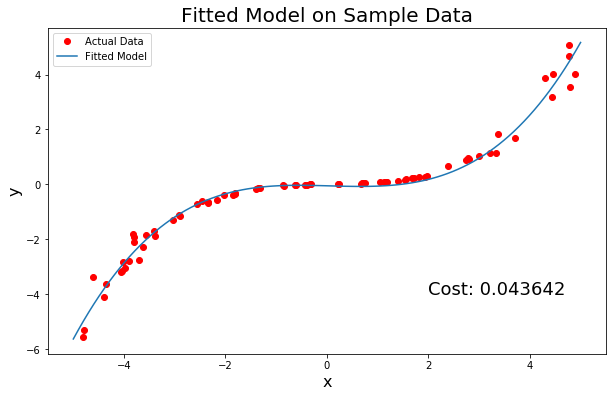

In [14]:
# get your predicted x and y values
graph_x = np.linspace(-5, 5, 100)
graph_y = calculated_thetas[3][0] * np.power(graph_x, 3) + calculated_thetas[2][0] * np.square(graph_x) + calculated_thetas[1][0] * graph_x + calculated_thetas[0][0]

# graph the values
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(random_x, random_y, 'ro', label = "Actual Data")
plt.plot(graph_x, graph_y, label = "Fitted Model")
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)
plt.title("Fitted Model on Sample Data", fontsize = 20)
plt.text(2, -4, "Cost: {0}".format(round(calculated_cost, 6)), fontsize = 18)
plt.legend()

Hopefully your data fits this model decently well. If it does, congratulations! You just wrote your first natural language processing model!